## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import linear_kernel,sigmoid_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Dataset -Description
* **show_id** - numeric Value of Shows available in Netflix
* **type** - Type of show avilable on Netflix - Movie and TV show
* **title**- Title of show avilable on Netflix
* **director**- Directors listed in Movie and TV show
* **cast** - Actor and Actress
* **country**-  Origin country of the show 
* **date_added** -Year when conted added to Netflux
* **release_year** - Year of release
* **rating** - Rating given by the users
* **duration** - Duration of the show avilable on Netflix
* **listed_in**-  Genre of the show on Netflix
* **description**- - Decription given by Users

## Importing Dataset

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Overview

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [7]:
netflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [8]:
netflix['director'].value_counts()

Raúl Campos, Jan Suter                    18
Marcus Raboy                              16
Jay Karas                                 14
Cathy Garcia-Molina                       13
Youssef Chahine                           12
                                          ..
Chris Bell, Josh Alexander, Greg Young     1
John Patrick Shanley                       1
Hikari                                     1
Rodolphe Guenoden                          1
Robert Townsend                            1
Name: director, Length: 4049, dtype: int64

## Data Cleaning and Manipulation

In [9]:
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix["year_added"]=netflix["date_added"].dt.year
netflix["month_added"]=netflix["date_added"].dt.month

In [10]:
netflix['cast'].replace(np.nan, 'No Data',inplace = True)
netflix['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No Data
Name: cast, Length: 7787, dtype: object

In [11]:
#eTokenizing the ratings and mapping them whether they are rated for kids or adults
netflix["rating_score"]=netflix["rating"].map({"TV-Y":0,"UR":0,"NR":0,"TV-Y7":1,"TV-Y7-FV":2,"TV-G":3,
                                               "G":3,"TV-PG":4,"PG":4,"TV-14":5,"PG-13":5,"R":6,"TV-MA":7,"NC-17":7})
netflix["ratings_sensitivity"]=np.where(np.isin(netflix["rating_score"],[0,1,2]),"kids","adults")

In [12]:
netflix["rating_score"]

0       7.0
1       7.0
2       6.0
3       5.0
4       5.0
       ... 
7782    7.0
7783    5.0
7784    7.0
7785    4.0
7786    7.0
Name: rating_score, Length: 7787, dtype: float64

In [13]:
netflix["ratings_sensitivity"]

0       adults
1       adults
2       adults
3       adults
4       adults
         ...  
7782    adults
7783    adults
7784    adults
7785    adults
7786    adults
Name: ratings_sensitivity, Length: 7787, dtype: object

In [14]:
netflix['year_added'].value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

In [15]:
netflix_new = pd.read_csv('netflix_titles.csv')
netflix_new['director'] = netflix_new['director'].fillna("")
netflix_new['cast'] = netflix_new['cast'].fillna("")
netflix_new['combined'] = netflix_new['description'] + netflix_new['cast'] + netflix_new['director']
netflix_new.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...


## Exploratory Data Analysis (EDA)

The number of movies on Netflix are 5377


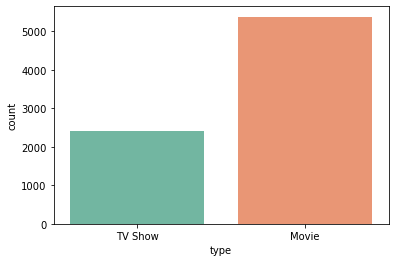

In [16]:
sns.countplot(x = netflix['type'],color = 'red',data=netflix,palette="Set2")
print("The number of movies on Netflix are",max(netflix['type'].value_counts()))

<h3> From the above plot it is clear that there are more number of movies on Netflix than TV shows </h3>

Text(0.5, 1.0, 'Ratings of shows/movies on Netflix')

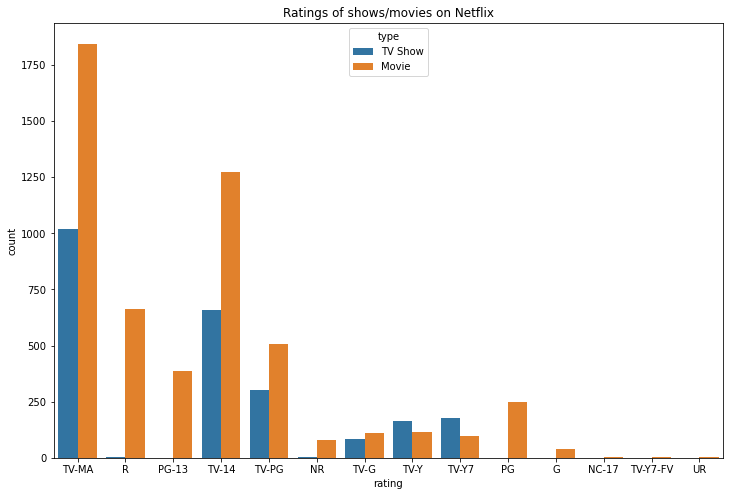

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x = netflix['rating'],hue='type',data=netflix)
plt.title('Ratings of shows/movies on Netflix')

In [18]:
x= netflix['country'].value_counts().head(20)
x

United States                    2555
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Indonesia                          70
Nigeria                            70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: country, dtype: int64

<h3> Visualising the amount of content by country </h3>

The maximum number of movies and TV shows which appeared on Netflix are 2555


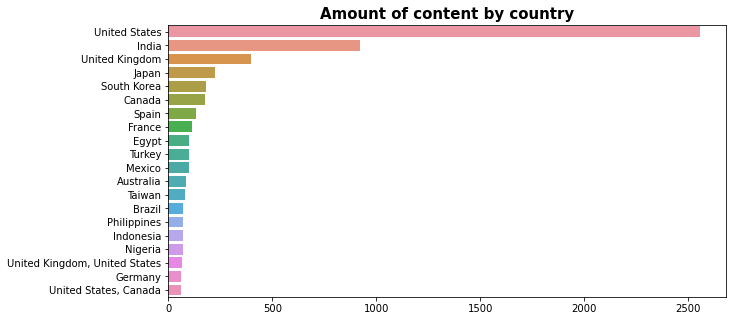

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x = x.values,y = x.index)
plt.title("Amount of content by country",fontsize = 15,fontweight="bold")
print("The maximum number of movies and TV shows which appeared on Netflix are",max(x.values))

<h3> United States appears to be the country with maximum number of content on Netflix </h3>

Text(0.5, 1.0, 'Top 10 directors on Netflix')

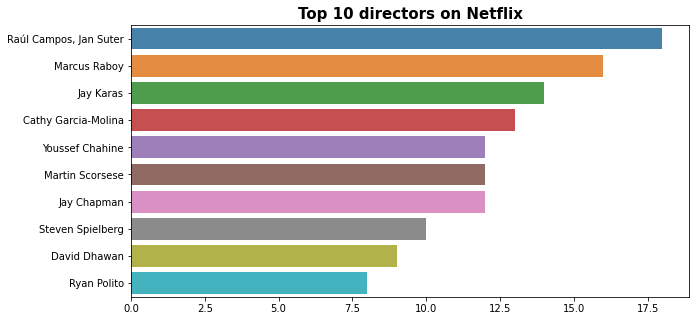

In [20]:
plt.figure(figsize=(10,5))
maker = netflix['director'].value_counts().head(10)
sns.barplot(x=maker.values,y=maker.index,alpha=0.9)
plt.title("Top 10 directors on Netflix",fontsize=15, fontweight="bold")

<h3> Clearly, Raul Campos and Jan Suter have directed the most number of films which have released on Netflix. </h3>            


In [21]:
# Constructing a list which will store the duration of all the tv shows and movies on Netflix
duration_movie=[]
for i in range(netflix["duration"].shape[0]):
    if netflix["type"][i]=="Movie":
        duration_movie.append(netflix['duration'][i]) #Appending the durations of movies in the list

duration_movie_num=[]
for j in range(len(duration_movie)):
    duration_movie_num.append(int(duration_movie[j].split(" ")[0]))

Text(3.674999999999997, 0.5, 'DENSITY')

<Figure size 1080x720 with 0 Axes>

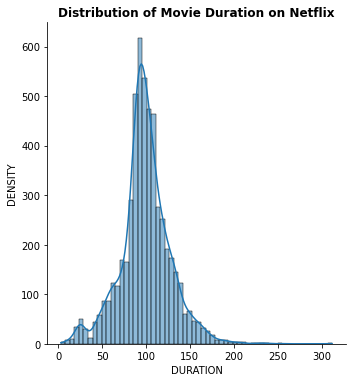

In [22]:
plt.figure(figsize=(15,10))
sns.displot(data = duration_movie_num,bins=60,kde=True,)
sns.color_palette("rocket", as_cmap=True)
plt.title('Distribution of Movie Duration on Netflix',fontweight = "bold")
plt.xlabel("DURATION")
plt.ylabel("DENSITY")

<h3> The above distribution plot shows that most of the movies on Netflix was of 100 minutes </h3>

In [23]:
#Classifying the movies into kids and adults categories in each year
rating_trend= pd.DataFrame({'Year':np.sort(netflix['year_added'].unique())})
kids_count=[]
for i in np.sort(netflix['year_added'].unique()):
    kids_count.append(np.argwhere((netflix['year_added'].to_numpy()==i)&(netflix['ratings_sensitivity'].to_numpy()=='kids')).shape[0])
    
    
adult_count=[]
for i in np.sort(netflix['year_added'].unique()):
    adult_count.append(np.argwhere((netflix['year_added'].to_numpy()==i)&(netflix['ratings_sensitivity'].to_numpy()=='adults')).shape[0])
    
    
rating_trend['Kids']= kids_count
rating_trend['Adults']= adult_count
plot=rating_trend.dropna()

In [24]:
rating_trend

,Year,Kids,Adults
0,2008.0,0,2
1,2009.0,0,2
2,2010.0,1,0
3,2011.0,0,13
4,2012.0,0,3
5,2013.0,4,7
6,2014.0,2,23
7,2015.0,20,68
8,2016.0,86,357
9,2017.0,111,1114


<h3> Line Distribution of ratings over the years </h3>

Text(0, 0.5, 'FREQUENCY')

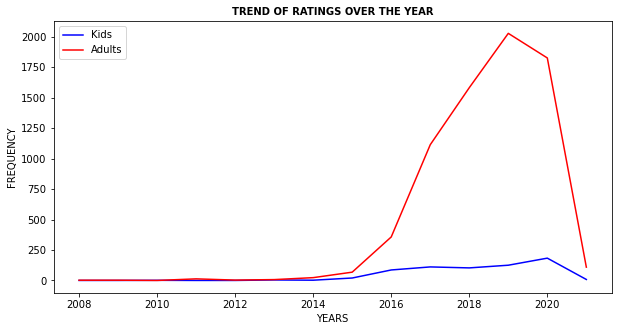

In [25]:
plt.figure(figsize=(10,5))
plt.plot(plot['Year'],plot['Kids'], color='blue')
plt.plot(plot['Year'],plot['Adults'], color='red')
plt.legend(labels=["Kids","Adults"],loc="upper left")
plt.title("TREND OF RATINGS OVER THE YEAR",fontsize=10,fontweight="bold")
plt.xlabel("YEARS")
plt.ylabel("FREQUENCY")

<h3> It can be seen clearly that the number of adult movies rose dramatically in the year 2019 </h3>

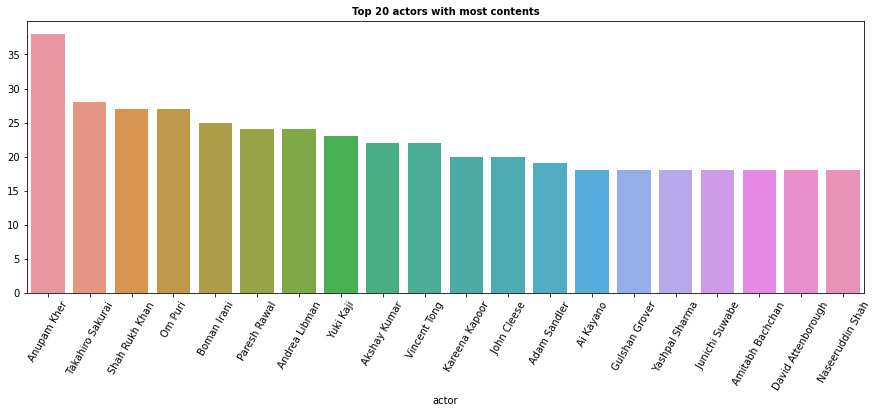

The maximum number of films an actor has acted are 38


In [26]:
from collections import Counter
actor = netflix['cast']
filtered_actor = actor[actor != 'No Data']
actor_count = pd.Series(dict(Counter(','.join(filtered_actor).split(',')))).sort_values(ascending=False)
top20actor = actor_count.head(20)

plt.figure(figsize=(15,5))
sns.barplot(x= top20actor.index, y=top20actor)
plt.xticks(rotation=60)
plt.title('Top 20 actors with most contents', fontsize=10, fontweight='bold')
plt.xlabel('actor')
plt.show()
print("The maximum number of films an actor has acted are",max(top20actor.values))

<h3> The actor who has acted in maximum number of films is Anupam Kher </h3>

<h3> Top 10 Genre in Movies on Netflix </h3>

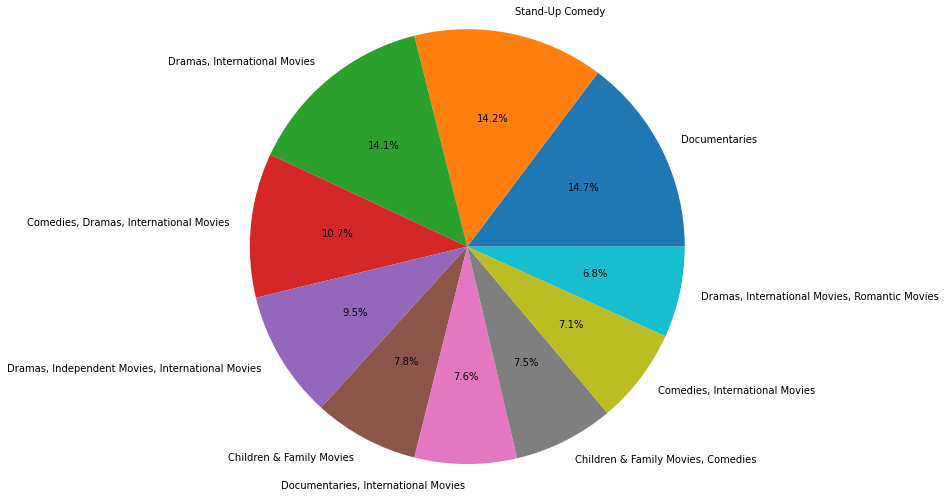

In [27]:
fig,ax = plt.subplots()
movies_df = netflix[netflix.type=="Movie"]
ax.pie(movies_df['listed_in'].value_counts().head(10).values,labels=movies_df['listed_in'].value_counts().head(10).index, radius = 2.5,autopct='%1.1f%%')
plt.show()

<h3> The above pie chart shows that documentaries seem to be the most popular genre in movies on Netflix </h3>

<h3> Top 10 Genre in TV shows on Netflix </h3>

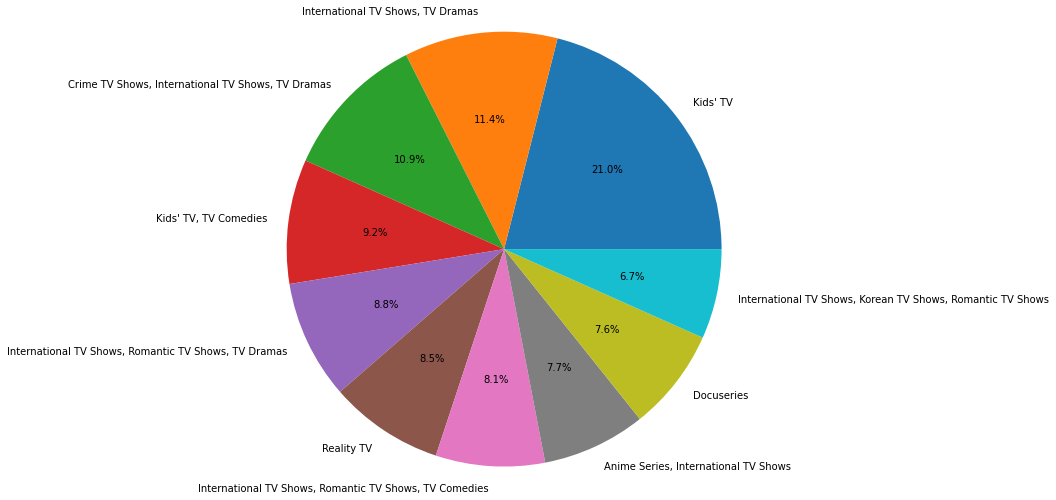

In [28]:
fig, ax = plt.subplots()
tv_show_df = netflix[netflix.type=='TV Show']
ax.pie(tv_show_df['listed_in'].value_counts().head(10).values,labels=tv_show_df['listed_in'].value_counts().head(10).index, radius = 2.5,autopct='%1.1f%%')
plt.show()

<h3> From the above barplot it is quite evident that the Kids TV is the most popular genre on Netflix  </h3>


## Recommender System
<h3> 1. Movie Recommendation using sigmoid kernel </h3>

In [29]:
movies = netflix_new[netflix_new['type']=='Movie'].reset_index()
movies = movies.drop(columns = ['duration','country','date_added','release_year','show_id','type','index','listed_in'])

In [30]:
movies['director'] = movies['director'].fillna("")
movies['cast'] = movies['cast'].fillna("")
movies['combined'] = movies['description']+movies['cast']+movies['director']
movies.head(5)

,title,director,cast,rating,description,combined
0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",TV-MA,After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
1,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",R,"When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",PG-13,"In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
3,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",PG-13,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...
4,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",TV-MA,"After an awful accident, a couple admitted to ...","After an awful accident, a couple admitted to ..."


In [31]:
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')

In [32]:
movies['combined'] = movies['combined'].fillna("")

In [33]:
tfv_matrix = tfv.fit_transform(movies['combined'])
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig[0]
indices = pd.Series(movies.index,index = movies['title']).drop_duplicates()
indices

C:\Users\potea\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


title
7:19                                          0
23:59                                         1
9                                             2
21                                            3
122                                           4
                                           ... 
Zoom                                       5372
Zozo                                       5373
Zubaan                                     5374
Zulu Man in Japan                          5375
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    5376
Length: 5377, dtype: int64

In [34]:
#Function to recommend movies based on watch history using sigmoid kernel
def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return sig_scores,movies['title'].iloc[movies_indices]

def give_similarity(sim_scores,recommend):
    sim_scores = np.array(sim_scores)
    watch_now = np.vstack((recommend.values,sim_scores[:,1])).T
    df = pd.DataFrame(data=watch_now,columns=["TV Show","Similarity"])
    return df

In [35]:
sig_scores,recommend = recommend('Zubaan')
give_similarity(sig_scores,recommend)

,TV Show,Similarity
0,The Cakemaker,0.761626
1,Silent Hill: Revelation,0.761625
2,John & Jane,0.761616
3,Guilty,0.761616
4,Be Somebody,0.761614
5,The Battered Bastards of Baseball,0.761613
6,Forgotten,0.761613
7,Dieter Nuhr: Nuhr in Berlin,0.761613
8,Bleed for This,0.761613
9,Sam Kinison: Live in Vegas,0.761613


<h3> 2. TV shows recommendation using sigmoid kernel </h3>

In [39]:
shows = netflix_new[netflix_new['type']=='TV Show'].reset_index()
shows = shows.drop(columns = ['duration','country','date_added','release_year','show_id','type','index','listed_in'])

In [40]:
shows['director'] = shows['director'].fillna("")
shows['cast'] = shows['cast'].fillna("")
shows['combined'] = shows['cast']+shows['director']+shows['description']

In [41]:
shows.head()

,title,director,cast,rating,description,combined
0,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",TV-MA,In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",TV-MA,A genetics professor experiments with a treatm...,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan..."
2,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...",TV-MA,"In this dark alt-history thriller, a naïve law...","Robert Więckiewicz, Maciej Musiał, Michalina O..."
3,1994,Diego Enrique Osorno,,TV-MA,Archival video and new interviews examine Mexi...,Diego Enrique OsornoArchival video and new int...
4,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",TV-14,"As a psychology professor faces Alzheimer's, h...","Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-..."


In [42]:
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')
shows['combined'] = shows['combined'].fillna("")

In [43]:
tfv_matrix_shows = tfv.fit_transform(shows['combined'])
sig = sigmoid_kernel(tfv_matrix_shows,tfv_matrix_shows)
sig[0]
indices = pd.Series(shows.index,index = shows['title']).drop_duplicates()
indices

C:\Users\potea\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ral', 'rd', 'rds', 'ready', 'reafter', 'reas', 'reby', 'red', 'ree', 'refore', 'rehand', 'rein', 'reover', 'rest', 'reupon', 'rever', 'rhaps', 'ribe', 'ring', 'rious', 'rly', 'rmer', 'rmerly', 'rom', 'ront', 'ross', 'rough', 'roughout', 'round', 'rs', 'rself', 'rselves', 'rst', 'rt', 'rtheless', 'rther', 'rty', 'ru', 'rwards', 'rwise', 'ry', 'ryone', 'rything', 'rywhere'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


title
3%                          0
46                          1
1983                        2
1994                        3
Feb-09                      4
                         ... 
Zindagi Gulzar Hai       2405
Zoids Wild               2406
Zombie Dumb              2407
Zona Rosa                2408
Zumbo's Just Desserts    2409
Length: 2410, dtype: int64

In [44]:
#Function to recommend TV shows based on watch history using sigmoid kernel
def recommend_tv(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    shows_indices = [i[0] for i in sig_scores]
    return sig_scores,shows['title'].iloc[shows_indices]

def give_similarity(sim_scores,recommend):
    sim_scores = np.array(sim_scores)
    watch_now = np.vstack((recommend.values,sim_scores[:,1])).T
    df = pd.DataFrame(data=watch_now,columns=["TV Show","Similarity"])
    return df

In [45]:
sig_scores,recommend = recommend_tv("Friends")
give_similarity(sig_scores,recommend)

,TV Show,Similarity
0,Genius of the Modern World,0.761694
1,Comedians in Cars Getting Coffee,0.761677
2,The goop lab with Gwyneth Paltrow,0.761669
3,Melodies of Life - Born This Way,0.761662
4,JingleKids,0.76166
5,Strawberry Shortcake: Berry Bitty Adventures,0.76166
6,VeggieTales in the House,0.761658
7,Scandal,0.761654
8,Monty Python Best Bits (mostly),0.761652
9,Monty Python's Flying Circus,0.761651


In [46]:
sig_scores,recommend = recommend_tv("Breaking Bad")
give_similarity(sig_scores,recommend)

,TV Show,Similarity
0,Between,0.761651
1,Spartacus,0.761648
2,Mad Men,0.761647
3,Lucifer,0.761644
4,One Spring Night,0.761641
5,Prison Playbook,0.76164
6,Chasing Cameron,0.761639
7,Babylon Berlin,0.761639
8,The Bride of Habaek,0.761637
9,Dear White People,0.761637


In [47]:
sig_scores,recommend = recommend_tv("Narcos")
give_similarity(sig_scores,recommend)

,TV Show,Similarity
0,Playing with Fire,0.761669
1,Miss Dynamite,0.761663
2,KO One Return,0.761654
3,Juana Inés,0.761653
4,Control Z,0.761652
5,Drug Squad: Costa del Sol,0.761646
6,Angel Beats!,0.761644
7,Narcos: Mexico,0.761643
8,Giri / Haji,0.761643
9,Historia de un clan,0.761642


In [48]:
sig_scores,recommend = recommend_tv("Sacred Games")
give_similarity(sig_scores,recommend)

,TV Show,Similarity
0,YOM,0.761672
1,7 (Seven),0.761667
2,Bright: The Music Videos,0.761666
3,Planet Earth: The Complete Collection,0.761657
4,Paava Kadhaigal,0.761656
5,Dancing Queen,0.761653
6,Million Pound Menu,0.761652
7,21 Sarfarosh: Saragarhi 1897,0.76165
8,Twirlywoos,0.761647
9,The Great British Baking Show: Holidays,0.761647


<h3> 3. Movie recommendation using linear kernel </h3>

In [49]:
tfidf = TfidfVectorizer(stop_words='english')
movies['combined'] = movies['combined'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies['combined'])
tfidf_matrix.shape

(5377, 40215)

In [50]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(5377, 5377)

In [51]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

title
7:19                                          0
23:59                                         1
9                                             2
21                                            3
122                                           4
                                           ... 
Zoom                                       5372
Zozo                                       5373
Zubaan                                     5374
Zulu Man in Japan                          5375
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    5376
Length: 5377, dtype: int64

In [52]:
#Function to recommend movies based on watch history using linear kernel
def recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return sim_scores,movies['title'].iloc[movie_indices]

def give_similarity(sim_scores,recommend):
    sim_scores = np.array(sim_scores)
    watch_now = np.vstack((recommend.values,sim_scores[:,1])).T
    df = pd.DataFrame(data=watch_now,columns=["TV Show","Similarity"])
    return df

In [53]:
sim_scores,recommend = recommendations("Zubaan")
give_similarity(sim_scores,recommend)

,TV Show,Similarity
0,Baazaar,0.0961627
1,Jatts in Golmaal,0.0874382
2,The Battered Bastards of Baseball,0.0818297
3,Kajraare,0.0789774
4,Evening Shadows,0.0777962
5,Ankur Arora Murder Case,0.0753753
6,Sanju,0.0744755
7,Krish Trish and Baltiboy: Face Your Fears,0.0709768
8,My Own Man,0.0708897
9,Game,0.0702755


In [54]:
sim_scores,recommend = recommendations("Sanju")
give_similarity(sim_scores,recommend)

,TV Show,Similarity
0,PK,0.163064
1,Lust Stories,0.141359
2,Anwar,0.128333
3,The Zoya Factor,0.126693
4,Haseena Maan Jaayegi,0.118308
5,Dharam Sankat Mein,0.117773
6,Phir Bhi Dil Hai Hindustani,0.107479
7,Do Paise Ki Dhoop Chaar Aane Ki Baarish,0.107232
8,Chup Chup Ke,0.101215
9,Ghulam-E-Musthafa,0.100058


<h3> 4. TV Show recommendation using linear kernel </h3>

In [55]:
tfidf = TfidfVectorizer(stop_words='english')
shows['combined'] = shows['combined'].fillna('')
tfidf_matrix = tfidf.fit_transform(shows['combined'])
tfidf_matrix.shape

(2410, 23998)

In [56]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(2410, 2410)

<h3> Indexing the titles of the movies and TV shows using dataframes </h3>

In [57]:
indices = pd.Series(shows.index, index=shows['title']).drop_duplicates()
indices

title
3%                          0
46                          1
1983                        2
1994                        3
Feb-09                      4
                         ... 
Zindagi Gulzar Hai       2405
Zoids Wild               2406
Zombie Dumb              2407
Zona Rosa                2408
Zumbo's Just Desserts    2409
Length: 2410, dtype: int64

In [58]:
#Function to recommend TV shows based on watch history using linear kernel
def recommendations_tv_new(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    shows_indices = [i[0] for i in sim_scores]
    return sim_scores,shows['title'].iloc[shows_indices]

def give_similarity(sim_scores,recommend):
    sim_scores = np.array(sim_scores)
    watch_now = np.vstack((recommend.values,sim_scores[:,1])).T
    df = pd.DataFrame(data=watch_now,columns=["TV Show","Similarity"])
    return df

In [59]:
sim_scores,recommend = recommendations_tv_new("Friends")
give_similarity(sim_scores,recommend)

,TV Show,Similarity
0,Episodes,0.144529
1,Man with a Plan,0.134775
2,Life Story,0.0916754
3,BoJack Horseman,0.0819745
4,Criminal Minds,0.0726062
5,JingleKids,0.0716506
6,Gossip Girl,0.0676534
7,Blood of Zeus,0.0668356
8,Dinotrux Supercharged,0.0635935
9,Diagnosis,0.0615813


In [60]:
sim_scores,recommend = recommendations_tv_new("Breaking Bad")
give_similarity(sim_scores,recommend)

,TV Show,Similarity
0,Better Call Saul,0.15939
1,W/ Bob & David,0.0968111
2,A Lion in the House,0.0757464
3,Disjointed,0.0738317
4,Huntik: Secrets and Seekers,0.0716259
5,Food: Delicious Science,0.070808
6,Alexa & Katie,0.0624082
7,Refresh Man,0.0613797
8,Chill with Bob Ross,0.0604549
9,Servant of the People,0.0584737


In [61]:
sim_scores,recommend = recommendations_tv_new("Narcos")
give_similarity(sim_scores,recommend)

,TV Show,Similarity
0,Wild District,0.172709
1,El Cartel,0.144272
2,Dueños del paraíso,0.128062
3,The Great Heist,0.12172
4,Narcos: Mexico,0.118788
5,La Reina del Sur,0.1145
6,Miss Dynamite,0.113969
7,Luis Miguel - The Series,0.105712
8,La Piloto,0.103434
9,Sin Senos sí Hay Paraíso,0.102956


In [62]:
sim_scores,recommend = recommendations_tv_new("Sacred Games")
give_similarity(sim_scores,recommend)

,TV Show,Similarity
0,GHOUL,0.090634
1,Taj Mahal 1989,0.0706156
2,The Truth Seekers,0.0655705
3,Delhi Crime,0.0648435
4,7 (Seven),0.0627579
5,Khotey Sikkey,0.0593778
6,Hashoter Hatov,0.0584207
7,Humsafar,0.0544865
8,Khaani,0.0526766
9,The Keepers,0.0516246


<h3> Thus, the recommendation using linear kernel works better than using sigmoid kernel</h3>